In [2]:
import numpy as np 
import pandas as pd 

import matplotlib as mpl 
import matplotlib.pyplot as plt 

from matplotlib.animation import FuncAnimation 

from sklearn.datasets import load_boston 
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler 

from IPython.display import HTML


In [3]:
#load the dataset
boston=load_boston() 
print(boston.DESCR) 


.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
features=pd.DataFrame(boston.data,columns=boston.feature_names) 
features


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [5]:
target=pd.DataFrame(boston.target,columns=['target'])
target 


,target
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [6]:
features['AGE']


0      65.2
1      78.9
2      61.1
3      45.8
4      54.2
       ... 
501    69.1
502    76.7
503    91.0
504    89.3
505    80.8
Name: AGE, Length: 506, dtype: float64

In [7]:
max(target['target'])

50.0

In [8]:
min(target['target'])

5.0

In [9]:
df=pd.concat([features,target],axis=1) 
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [10]:
df.describe().round(decimals=2)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.22,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


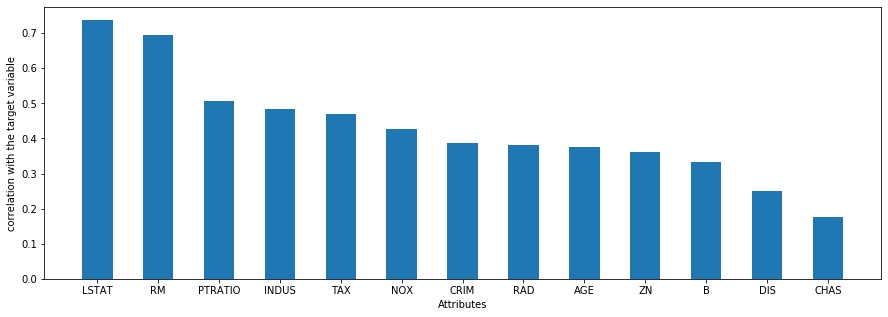

In [11]:
corr=df.corr('pearson')
corrs=[abs(corr[attr]['target']) for attr in list(features)]
l =list(zip(corrs,list(features)))
l.sort(key=lambda x:x[0],reverse=True)      
corrs,labels=list(zip((*l)))
index=np.arange(len(labels))
plt.figure(figsize=(15,5))
plt.bar(index,corrs,width=0.5)
plt.xlabel('Attributes')
plt.ylabel('correlation with the target variable')
plt.xticks(index,labels)
plt.show()

In [23]:
X=df['LSTAT'].values
print(X)
Y=df['target'].values


[ 4.98  9.14  4.03  2.94  5.33  5.21 12.43 19.15 29.93 17.1  20.45 13.27
 15.71  8.26 10.26  8.47  6.58 14.67 11.69 11.28 21.02 13.83 18.72 19.88
 16.3  16.51 14.81 17.28 12.8  11.98 22.6  13.04 27.71 18.35 20.34  9.68
 11.41  8.77 10.13  4.32  1.98  4.84  5.81  7.44  9.55 10.21 14.15 18.8
 30.81 16.2  13.45  9.43  5.28  8.43 14.8   4.81  5.77  3.95  6.86  9.22
 13.15 14.44  6.73  9.5   8.05  4.67 10.24  8.1  13.09  8.79  6.72  9.88
  5.52  7.54  6.78  8.94 11.97 10.27 12.34  9.1   5.29  7.22  6.72  7.51
  9.62  6.53 12.86  8.44  5.5   5.7   8.81  8.2   8.16  6.21 10.59  6.65
 11.34  4.21  3.57  6.19  9.42  7.67 10.63 13.44 12.33 16.47 18.66 14.09
 12.27 15.55 13.   10.16 16.21 17.09 10.45 15.76 12.04 10.3  15.37 13.61
 14.37 14.27 17.93 25.41 17.58 14.81 27.26 17.19 15.39 18.34 12.6  12.26
 11.12 15.03 17.31 16.96 16.9  14.59 21.32 18.46 24.16 34.41 26.82 26.42
 29.29 27.8  16.65 29.53 28.32 21.45 14.1  13.28 12.12 15.79 15.12 15.02
 16.14  4.59  6.43  7.39  5.5   1.73  1.92  3.32 11.

In [12]:
print(Y[:5])

[24.  21.6 34.7 33.4 36.2]


In [21]:
x_scaler=MinMaxScaler()
X=x_scaler.fit_transform(X.reshape(-1,1))
X=X[:,-1]
y_scaler=MinMaxScaler()
Y=y_scaler.fit_transform(Y.reshape(-1,1))
Y=Y[:,-1]

In [14]:
print(Y[:5])

[0.42222222 0.36888889 0.66       0.63111111 0.69333333]


In [15]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2)

In [16]:
#This function returns the meansquared error in the predicted values for the given m and c
def error(m,x,c,t): 
    N=x.size 
    e=sum(((m*x +c)-t) **2)
    return e * 1/(2*N)
    


In [17]:
#calculates gradient at current position and updates values of m and c 
def update(m,x,c,t,learning_rate):
    grad_m=sum(2 * ((m*x + c)-t)*x)
    grad_c=sum(2*  ((m*x +c)-t)) 
    m=m -grad_m * learning_rate 
    c=c-grad_c *learning_rate 
    return m,c


In [18]:
#implements gradient descent
def gradient_descent(init_m,init_c,x,t,learning_rate,iterations,error_threshold): 
    m=init_m 
    c=init_c 
    error_values=list() 
    mc_values=list() 
    for i in range(iterations):
        e=error(m,x,c,t) 
        if e<error_threshold:
            print('Error less than the threshold.Stopping gradient descent') 
            break 
        error_values.append(e) 
        m,c=update(m,x,c,t,learning_rate) 
        mc_values.append((m,c)) 
    return m,c,error_values,mc_values 
    

In [19]:
%%time 
init_m=0.9 
init_c=0 
learning_rate=0.001 
iterations=250 
error_threshold=0.001 
 
m,c,error_values,mc_values=gradient_descent(init_m,init_c,xtrain,ytrain,learning_rate,iterations,error_threshold) 


Wall time: 115 ms


In [20]:
mc_values_anim=mc_values[0:250:5]

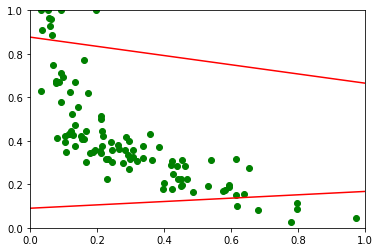

In [21]:
fig,ax=plt.subplots() 
ln, =plt.plot([],[],'ro-',animated=True) 

def init():
    plt.scatter(xtest,ytest,color='g') 
    ax.set_xlim(0,1.0) 
    ax.set_ylim(0,1.0) 
    return ln, 
def update_frame(frame): 
    m,c=mc_values_anim[frame] 
    x1,y1= -0.5,m * -.5 +c 
    x2,y2=1.5,m*1.5 +c 
    ln.set_data([x1,x2],[y1,y2])
    return ln, 
plt.plot(mc_values_anim,color='r')
anim=FuncAnimation(fig,update_frame,frames=range(len(mc_values_anim)),init_func=init,blit=True)
#HTML(anim.to_html5_video()) to display in notebook as an html video

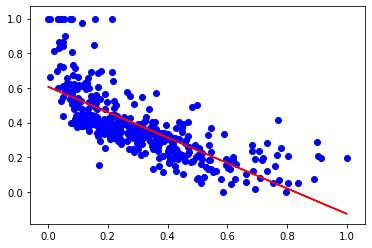

In [22]:
#plotting regression line on training dataset
plt.scatter(xtrain,ytrain,color='b') 
plt.plot(xtrain,(m*xtrain +c),color='r') 


Text(0.5, 0, 'Iterations')

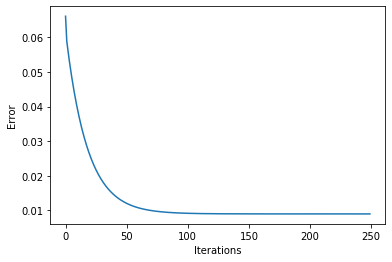

In [23]:
#plotting error values
plt.plot(np.arange(len(error_values)),error_values)
plt.ylabel('Error')
plt.xlabel('Iterations')

In [24]:
predicted=(m*xtest)+c
predicted

array([ 0.4121348 ,  0.54372972,  0.54960993,  0.37300102,  0.31318515,
        0.47884471,  0.21585762,  0.58103861,  0.39003334,  0.50905679,
        0.48878023,  0.17084364,  0.42653116,  0.15583898,  0.10575586,
        0.18382065,  0.55670673,  0.24931396, -0.1077564 ,  0.12684349,
        0.2756735 ,  0.38658632,  0.13698178,  0.53075272,  0.54900163,
        0.27425414,  0.51169275,  0.4399137 ,  0.46951749,  0.54007994,
        0.39591355,  0.15583898,  0.39003334,  0.43504732,  0.3584019 ,
        0.58245797,  0.55812609,  0.50865126,  0.35819913,  0.33832809,
        0.46424558,  0.26776564,  0.45451283,  0.51939784,  0.51797848,
        0.53014442,  0.38111165,  0.46201516,  0.3448166 ,  0.29351688,
        0.27587627,  0.45106581,  0.3235262 ,  0.45187687,  0.49567426,
        0.28256753,  0.48411662,  0.17814321,  0.40402417,  0.53866058,
        0.54737951,  0.43018095,  0.52061444,  0.26249373,  0.31480728,
        0.47458663,  0.42754499,  0.43707498,  0.4470105 ,  0.44

In [25]:
mean_squared_error(ytest,predicted)

0.023593936595301807

In [26]:
p=pd.DataFrame(list(zip(xtest,ytest,predicted)),columns=['X','target_y','predicted_y'])
p.head()

,X,target_y,predicted_y
0,0.265177,0.364444,0.412135
1,0.086093,0.668889,0.543730
2,0.078091,0.664444,0.549610
3,0.318433,0.308889,0.373001
4,0.399834,0.206667,0.313185


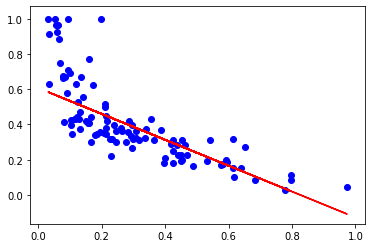

In [27]:
plt.scatter(xtest,ytest,color='b')
plt.plot(xtest,predicted,color='r')

In [28]:
predicted=predicted.reshape(-1,1)
xtest=xtest.reshape(-1,1)
ytest=ytest.reshape(-1,1)
xtest_scaled=x_scaler.inverse_transform(xtest)
ytest_scaled=y_scaler.inverse_transform(ytest)
predicted_scaled=y_scaler.inverse_transform(predicted)
xtest_scaled=xtest_scaled[:,-1]
ytest_scaled=ytest_scaled[:,-1]
predicted_scaled=predicted_scaled[:,-1]
p=pd.DataFrame(list(zip(xtest_scaled,ytest_scaled,predicted_scaled)),columns=['X','target_y','predicted_y'])
p=p.round(decimals=2)
p.head()

,X,target_y,predicted_y
0,11.34,21.4,23.55
1,4.85,35.1,29.47
2,4.56,34.9,29.73
3,13.27,18.9,21.79
4,16.22,14.3,19.09
